<a href="https://colab.research.google.com/github/maxpr22/Chiselni_Metody/blob/main/laba9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Процюк Максим Ярославович 2 курс 8 група
##Лабораторна робота 9
###25 варіант

Відрізок 1:
S_0(x) = 0.53 + 2.9885(x - 0.6) + 0.0(x - 0.6)^2 + 9.3869(x - 0.6)^3, x належить [0.6, 0.9]
Відрізок 2:
S_1(x) = 1.68 + 5.523(x - 0.9) + 8.4482(x - 0.9)^2 + -24.8579(x - 0.9)^3, x належить [0.9, 1.3]
Відрізок 3:
S_2(x) = 3.65 + 0.3498(x - 1.3) + -21.3813(x - 1.3)^2 + 29.2035(x - 1.3)^3, x належить [1.3, 1.8]
Відрізок 4:
S_3(x) = 2.13 + -0.3797(x - 1.8) + 22.424(x - 1.8)^2 + 18.6866(x - 1.8)^3, x належить [1.8, 2.2]
Значення сплайна:
x = 0.60, y = 0.530
x = 0.62, y = 0.531
x = 0.63, y = 0.542
x = 0.65, y = 0.561
x = 0.66, y = 0.589
x = 0.68, y = 0.625
x = 0.70, y = 0.669
x = 0.71, y = 0.719
x = 0.73, y = 0.776
x = 0.75, y = 0.840
x = 0.76, y = 0.909
x = 0.78, y = 0.984
x = 0.79, y = 1.064
x = 0.81, y = 1.148
x = 0.83, y = 1.237
x = 0.84, y = 1.329
x = 0.86, y = 1.424
x = 0.87, y = 1.522
x = 0.89, y = 1.623
x = 0.91, y = 1.725
x = 0.92, y = 1.829
x = 0.94, y = 1.934
x = 0.96, y = 2.040
x = 0.97, y = 2.146
x = 0.99, y = 2.251
x = 1.00, y = 2.357
x = 1.02, y = 2.461
x = 1.04, y

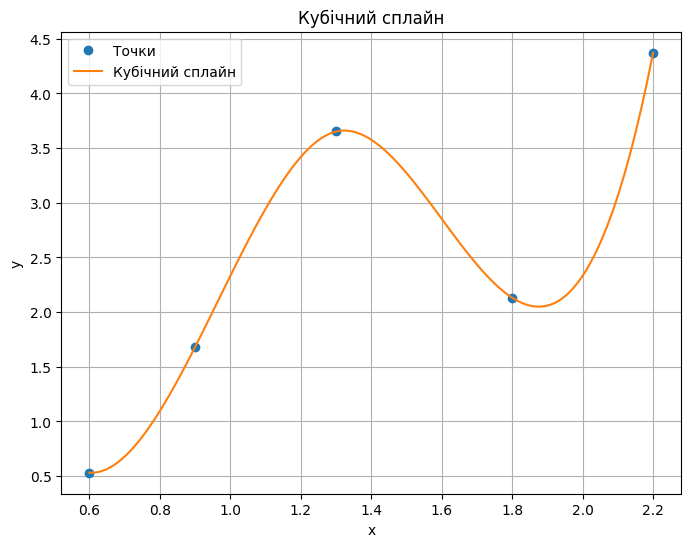

In [2]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = np.array([0.6, 0.9, 1.3 , 1.8, 2.2])
y = np.array([0.53 , 1.68, 3.65, 2.13, 4.37])
n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])
l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)
for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
c[n-1] = (alpha[n-1] - h[n-2] * z[n-2]) / (2 * (h[n-2] + mu[n-1]))
b[n-1] = (a[n] - a[n-1]) / h[n-1] - h[n-1] * (2 * c[n-1] + c[n-2]) / 3
d[n-1] = (c[n-1] - c[n-2]) / (3 * h[n-1])
for j in range(n - 2, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")
cs = CubicSpline(x, y)
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)
print("Значення сплайна:")
for i in range(len(x_new)):
 print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()